## KNN-Based Predictive Modeling for Customer Churn in Telecom Services

### __Made by [Ahmad Shafique](https://www.linkedin.com/in/ahmadshafique443)__ 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loadind telecom_churn Dataset

In [2]:
telecom_data = pd.read_csv('telecom_churn_clean.csv')
telecom_data.drop(columns=' ', axis=1).head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Exploring Dataset

In [3]:
telecom_data.shape

(3333, 20)

In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0                           3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [5]:
telecom_data.isnull().sum()

                          0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

## Selecting Independent and Dependent variables

In [6]:
X = telecom_data.drop("churn", axis=1).values
y = telecom_data["churn"].values

## Splitting data for training and testing purposes

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42, stratify=y)

## Training and testing our model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neighbors = np.arange(1, 15)
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
	model = KNeighborsClassifier(n_neighbors = neighbor)
	model.fit(X_train, y_train)
	train_accuracies[neighbor] = accuracy_score(y_train, model.predict(X_train))
	test_accuracies[neighbor] = accuracy_score(y_test, model.predict(X_test))

## Visualizing accuracy score on various no of neigbors

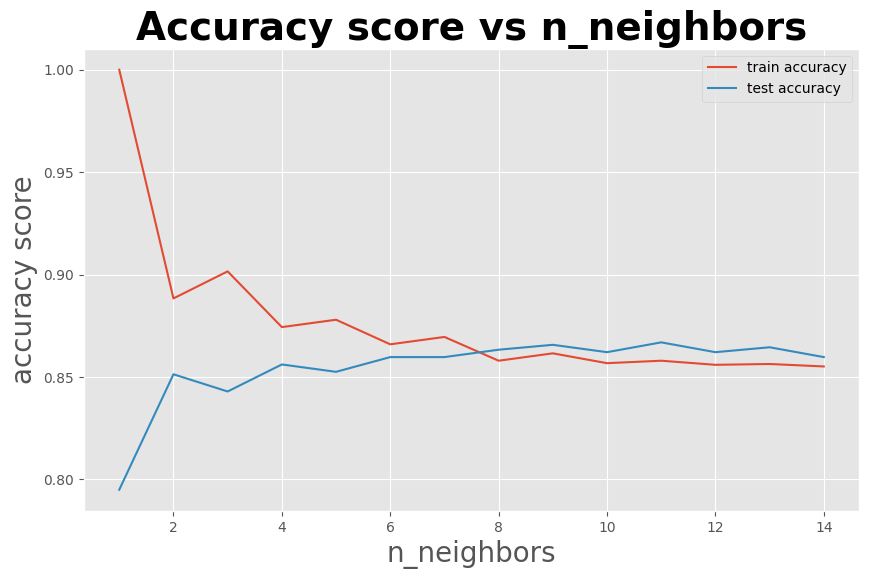

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(neighbors, train_accuracies.values(), label='train accuracy')
plt.plot(neighbors, test_accuracies.values(), label='test accuracy')
plt.legend()
plt.xlabel('n_neighbors', fontdict={'fontsize':20})
plt.ylabel('accuracy score', fontdict={'fontsize':20})
plt.title('Accuracy score vs n_neighbors', fontdict={'fontweight':'bold', 'fontsize':28})
plt.show()

## Selecting no of neighbors with highest accuracy score

In [10]:
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurracy score:', round(accuracy_score(y_test, y_pred),4))

Acurracy score: 0.8597


## Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[706   7]
 [110  11]]
